centroids 1 [ 0.12182585  0.27144058]


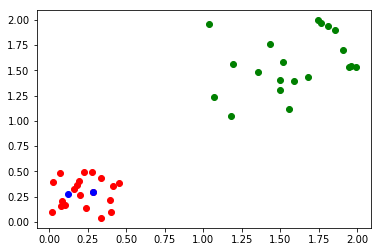

centroids 1 [ 1.19785443  1.17881811]


NameError: name 'time' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def load_dataset(name):
    return np.loadtxt(name)


def euclidian(a, b):
    return np.linalg.norm(a-b)


def plot(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.pause(0.8)


def kmeans(k, epsilon=0, distance='euclidian'):
    history_centroids = []
    if distance == 'euclidian':
        dist_method = euclidian
    dataset = load_dataset('durudataset.txt')
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    num_instances, num_features = dataset.shape
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    history_centroids.append(prototypes)
    prototypes_old = np.zeros(prototypes.shape)
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        prototypes_old = prototypes
        for index_instance, instance in enumerate(dataset):
            dist_vec = np.zeros((k, 1))
            for index_prototype, prototype in enumerate(prototypes):
                dist_vec[index_prototype] = dist_method(prototype,
                                                        instance)

            belongs_to[index_instance, 0] = np.argmin(dist_vec)

        tmp_prototypes = np.zeros((k, num_features))

        for index in range(len(prototypes)):
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            prototype = np.mean(dataset[instances_close], axis=0)
            tmp_prototypes[index, :] = prototype

        prototypes = tmp_prototypes

        history_centroids.append(tmp_prototypes)


    return prototypes, history_centroids, belongs_to


def execute():
    dataset = load_dataset('durudataset.txt')
    centroids, history_centroids, belongs_to = kmeans(2)
    plot(dataset, history_centroids, belongs_to)

execute()